In [7]:
import cv2, collections
import numpy as np
import matplotlib.pyplot as plt
import math
from queue import Queue

In [8]:
def centroid_bfs(img,r,c,col,vis):
    h,w = img.shape
    q = Queue()
    q.put((r,c))
    vis[r,c] = 1
    cent_x = 0.0
    cent_y = 0.0
    cnt = 0
    while not q.empty():
        r, c = q.get()
        cnt += 1
        cent_x += r
        cent_y += c
        if r-1>=0 and vis[r-1,c] == 0 and img[r-1,c]!=0:
            vis[r-1,c] = col
            q.put((r-1,c))
        if r+1<h and vis[r+1,c] == 0 and img[r+1,c]!=0:
            vis[r+1,c] = 1
            q.put((r+1,c))
        if c-1>=0 and vis[r,c-1] == 0 and img[r,c-1]!=0:
            vis[r,c-1] = 1
            q.put((r,c-1))
        if c+1<w and vis[r,c+1] == 0 and img[r,c+1]!=0:
            vis[r,c+1] = 1
            q.put((r,c+1))
            
    cent_x = cent_x//cnt
    cent_y = cent_y//cnt
    return cent_x, cent_y

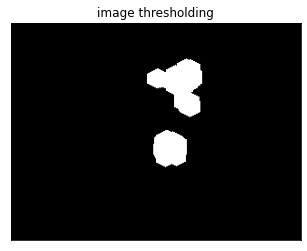

68.0 186.0
139.0 174.0


In [9]:
# centroid detection
img = cv2.imread('../images/joined_bl/frame4.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# taking OSTU's threshold for best results
th, thresh1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
img = (img > th).astype(np.uint8)

plt.imshow(img, cmap='gray')
plt.title('image thresholding')
plt.xticks([]), plt.yticks([]) 
plt.show()

cent = []
vis = np.zeros(img.shape)
h, w= img.shape
for i in range(h):
    for j in range(w):
        if img[i,j]==1 and vis[i,j]==0:
            cent_x, cent_y = centroid_bfs(img,i,j,1,vis)
            cent.append((cent_x,cent_y))
            
for i in range(len(cent)):
    print(cent[i][0],cent[i][1])
            